In [1]:
from PIL import Image
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers

In [2]:
data=[]
labels=[]
classes=43
cur_path=os.getcwd()
for i in range(classes):
    path=os.path.join(cur_path,'train',str(i))
    images=os.listdir(path)
    
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

In [3]:
data=np.array(data)
labels=np.array(labels)

In [4]:
data.shape

(39209, 30, 30, 3)

In [5]:
labels.shape

(39209,)

In [6]:
X_train,X_test,y_train,y_test=train_test_split(data,labels,test_size=0.2,random_state=0)

In [7]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((31367, 30, 30, 3), (7842, 30, 30, 3), (31367,), (7842,))

In [8]:
y_train=to_categorical(y_train,43)
y_test=to_categorical(y_test,43)

In [9]:
from tensorflow import keras

In [10]:
model=keras.Sequential([
    layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=X_train.shape[1:]),
    layers.Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    layers.MaxPool2D(pool_size=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(43,activation='sigmoid')
])

In [11]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [12]:
history=model.fit(X_train,y_train,batch_size=64,epochs=30,validation_data=(X_test,y_test))

Epoch 1/30
491/491 [==============================] - 73s 144ms/step - loss: 2.5252 - accuracy: 0.3851 - val_loss: 0.8120 - val_accuracy: 0.8095
Epoch 2/30
491/491 [==============================] - 71s 145ms/step - loss: 0.8393 - accuracy: 0.7541 - val_loss: 0.3299 - val_accuracy: 0.9144
Epoch 3/30
491/491 [==============================] - 69s 141ms/step - loss: 0.5070 - accuracy: 0.8500 - val_loss: 0.1862 - val_accuracy: 0.9531
Epoch 4/30
491/491 [==============================] - 68s 139ms/step - loss: 0.3664 - accuracy: 0.8921 - val_loss: 0.1158 - val_accuracy: 0.9707
Epoch 5/30
491/491 [==============================] - 69s 140ms/step - loss: 0.2832 - accuracy: 0.9141 - val_loss: 0.0976 - val_accuracy: 0.9719
Epoch 6/30
491/491 [==============================] - 69s 140ms/step - loss: 0.2430 - accuracy: 0.9283 - val_loss: 0.0997 - val_accuracy: 0.9712
Epoch 7/30
491/491 [==============================] - 69s 141ms/step - loss: 0.2401 - accuracy: 0.9327 - val_loss: 0.0851 - val_ac

In [13]:
model.save("my_model.h5")

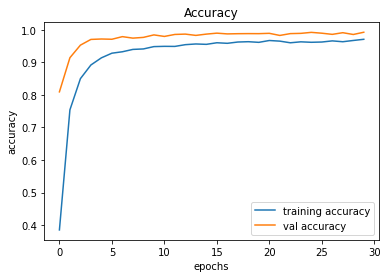

In [14]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

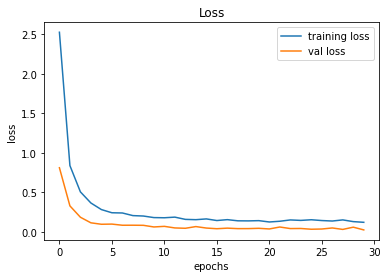

In [15]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [18]:
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test=np.array(data)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels, classes_x))

395/395 [==============================] - 9s 21ms/step
0.7445764053840064


In [19]:
model.save('traffic_classifier.h5')